<a href="https://colab.research.google.com/github/sayedmohamedscu/Face-detection-keras/blob/master/kerasfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/")
!ls

'15555555555 ya hazeeem .pdf'
'16.4.2017-promasr.com .ehi'
 20170820_001.m4a
 20170820_002.m4a
 20170820_003.m4a
 20376103_1969918213239757_3043836327352081043_n.jpg
 4_5825822678291841196.ePro
 910f530c-bc85-43e7-9cb2-a4e6d9c33a18.apk
 a8f3eacff0d334b725da71a508df768e.ehi
 admob.apk
 ah.apk
 Android.apk
 app-debug.apk
 -arr_4770903.apk
 B612_20170203_223937.jpg
 B612_20170203_224036.jpg
 B612_20170408_110643.jpg
 B612_20170408_170644.jpg
 B612_20171227_144221.jpg
 B612_20171227_144305.jpg
 B612_20171227_144404.jpg
'back - Elsayed mohamed.png'
 back.png
'base (1).apk'
'base (2).apk'
 base.apk
'Basics of Molecular Biology.ppt.ppt'
'BBC Results - Lesson 1.gsheet'
 bluetoth_rgb_led.ino
 -Chatty_talk_4823464.apk
'Colab Notebooks'
 com_sayed_wabgwtvykqukietxdihq.zip
 concept.pdf
 Cont1.apk
 Data_Augmentation_Medium
 Document2.docx
'Document from Sayed (1).pdf'
'Document from Sayed (2).pdf'
'Document from Sayed.pdf'
 face_classifier.zip
'face_classifier.zip (Unzipped Files)'
'face_classifier

In [0]:
import keras
from keras import models
from keras import layers

from keras.layers import Dense,GlobalAveragePooling2D,Flatten



In [0]:
from keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
base_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
x=base_model.output
from keras.models import Model

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(124, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model=Model(inputs=base_model.input,outputs=x)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(124, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_9 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 125       
Total params: 21,169,465
Trainable params: 21,169,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#base_dir = '/content/drive/My Drive/facess'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/drive/My Drive/facess/train',
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/facess/valid',
        
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')



Found 2644 images belonging to 2 classes.
Found 1869 images belonging to 2 classes.


In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
100/100 [==============================] - 75s 755ms/step - loss: 0.0597 - acc: 0.9815 - val_loss: 0.0027 - val_acc: 0.9990
Epoch 2/5
100/100 [==============================] - 74s 736ms/step - loss: 0.0116 - acc: 0.9960 - val_loss: 1.1083e-04 - val_acc: 1.0000
Epoch 3/5
100/100 [==============================] - 73s 727ms/step - loss: 0.0109 - acc: 0.9975 - val_loss: 2.2652e-05 - val_acc: 1.0000
Epoch 4/5
100/100 [==============================] - 72s 722ms/step - loss: 0.0046 - acc: 0.9995 - val_loss: 0.0014 - val_acc: 0.9990
Epoch 5/5
100/100 [==============================] - 72s 724ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 3.9125e-04 - val_acc: 1.0000


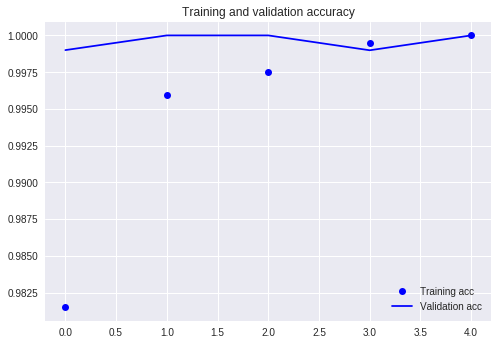

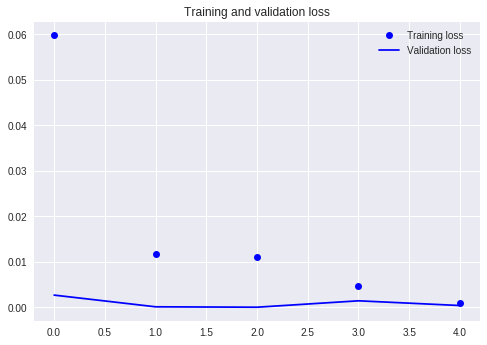

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('/content/drive/My Drive/facess/train/facesand cars.h5')
